> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset is compromised over 100,000 medical appointments in Brazil and is intended to be used to answer the question of why patients do not show up for their appointments. There are a number of features included in this dataset, including:
- PatientID: The unique ID for each patient. <br/>
- AppointmentID: The unique ID assigned to every appointment. <br/>
- Gender: The assigned gender of each patient. <br/>
- ScheduledDay: The day the appointment was scheduled.
- AppointmentDay: Which day of the week the appointment was scheduled for. <br/>
- Age: The age of the patient <br/>
- Neighborhood: The neighboorhood/location of the medical clinic. <br/>
- Scholarship: True or False (indicates whether or not a patient was on a scholarship)
- Hypertension: True or False
- Diabetes: True or False 
- Alcoholism: True or False
- Handcap: True or False (0 = no handicaps, other values indicate the number of handicaps)
- SMS_received: 1 or more messages sent to the patient
- No-show: Whether or not the patient was a no show, true or false.


### Question(s) for Analysis
#### Questions we'd like to answer:
- What is the overall appointment attendance rate (show vs. no show)
- Which features are the most likely to influence whether or not the appointment will be a no-show?

In [32]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm


% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> Load in the data, check for cleanliness, and then trim and clean  dataset for analysis. 


### Importing the Data


In [33]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_noShows = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
df_noShows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Summary of the Data

In [34]:
#random sample
df_noShows.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
84946,1.477345e+12,5759326,F,2016-06-01T12:25:33Z,2016-06-01T00:00:00Z,41,DO MOSCOSO,0,1,0,0,0,0,No
43991,8.675398e+12,5684372,M,2016-05-11T08:32:17Z,2016-05-11T00:00:00Z,0,GURIGICA,0,0,0,0,0,0,No
17202,9.289536e+11,5723652,M,2016-05-20T08:28:26Z,2016-05-30T00:00:00Z,43,COMDUSA,0,0,0,0,0,1,No
104958,2.599475e+14,5740614,F,2016-05-25T15:45:31Z,2016-06-02T00:00:00Z,51,SANTO ANDRÉ,0,1,1,0,0,1,No
54979,3.394458e+14,5675975,M,2016-05-09T14:47:49Z,2016-05-09T00:00:00Z,21,DA PENHA,1,0,0,0,0,0,No
81300,8.278448e+13,5592498,F,2016-04-18T08:06:16Z,2016-05-19T00:00:00Z,10,BONFIM,0,0,0,0,0,0,No
1053,1.139336e+12,5537656,F,2016-04-01T10:26:33Z,2016-04-29T00:00:00Z,18,SANTO ANTÔNIO,0,0,0,0,0,1,Yes
62821,7.247358e+13,5754288,F,2016-05-31T15:54:19Z,2016-05-31T00:00:00Z,58,JARDIM CAMBURI,0,0,0,0,0,0,No
50229,5.879397e+14,5630960,F,2016-04-27T16:59:45Z,2016-05-18T00:00:00Z,49,JARDIM DA PENHA,0,1,0,0,0,0,Yes
44204,2.394398e+11,5735766,F,2016-05-25T07:31:18Z,2016-05-25T00:00:00Z,1,SÃO BENEDITO,0,0,0,0,0,0,No


In [35]:
#summary statistics
df_noShows.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that the Age feature contains a value of -1. It is not possible for a patient to have a negative age. We'll need to conduct some analysis to determine how many appointment records may have an age that is less than zero. Depending on the severity of the issue, we can either impute the age feature with the mean value or remove those records.

In [36]:
#last 10 rows
df_noShows.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [37]:
# information on each feature, including counts and data types
df_noShows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


This dataset has 14 features, with a total of 110,526 rows. 

#### Data Quality Issues
- Negative Age
- Mispelled column names
- Incorrect data types for several columns
- Not necessarily a data issue, but creating dummies for the NoShow column may be beneficial for some analysis.

#### Other Observations

Important to note that Scholarship, Hypertension, Diabetes, Alcoholis, and Handicap fields, while of the integer data type, is actually categorical data - e.g. they are used as labels to classify data into categories like "yes" or "no".

Conversely, "No_show" is a string because the underlying data is string data - "Yes" and "No".


In [38]:
#Check for null values
df_noShows.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

While we already know that there are no Null values in this dataset based on the output of cell 9, it doesn't hurt to double check.

In [39]:
#check for duplicates
df_noShows.duplicated().sum()

0

There are no duplicate records in this dataset.

In [40]:
#Lets take a look at value counts for each relevant feature:
excludes = [0,1,2,3,4,5,6]
featuresToIncludes = df_noShows.columns.difference(df_noShows.columns[excludes])

for features in featuresToIncludes:
    counts = df_noShows[features].value_counts()
    print(f"Value Counts for {features}: ")
    print(counts)
    print()
    

Value Counts for Alcoholism: 
0    107167
1      3360
Name: Alcoholism, dtype: int64

Value Counts for Diabetes: 
0    102584
1      7943
Name: Diabetes, dtype: int64

Value Counts for Handcap: 
0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Value Counts for Hipertension: 
0    88726
1    21801
Name: Hipertension, dtype: int64

Value Counts for No-show: 
No     88208
Yes    22319
Name: No-show, dtype: int64

Value Counts for SMS_received: 
0    75045
1    35482
Name: SMS_received, dtype: int64

Value Counts for Scholarship: 
0    99666
1    10861
Name: Scholarship, dtype: int64




### Data Cleaning
 

In [41]:
#To maintain data integrity, we'll copy the contents of the original data frame to a new copy:
df_clean = df_noShows.copy()

#### Issue 1: Negative Age

In [42]:
#gather all records with a age that is less than 0
negativeAge = df_clean.query("Age < 0")
negativeAge

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Based on the dataframe query above, we can see that only one record has this issue. Considering this issue impacts very few records, we can opt to remove the data instead of imputing the missing data.

In [43]:
#drop the record above
df_clean = df_clean.drop(negativeAge.index)

In [44]:
#rerun the query to verify the record was dropped:
df_clean.query("Age < 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


#### Issue 2: Incorrect Datatypes

In [45]:
#convert date fields to datetime
df_clean.AppointmentDay = pd.to_datetime(df_clean.AppointmentDay)
df_clean.ScheduledDay = pd.to_datetime(df_clean.ScheduledDay)

In [46]:
#changing categorical data, expressed as int, to cateagory:
columns = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
for column in columns:
    df_clean[column] = df_clean[column].astype('category')

In [47]:
#convert ID fields to string:
columns = ['PatientId', 'AppointmentID']
for column in columns:
    df_clean[column] = df_clean[column].astype('str')

In [48]:
#verify changes
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null object
AppointmentID     110526 non-null object
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null category
Hipertension      110526 non-null category
Diabetes          110526 non-null category
Alcoholism        110526 non-null category
Handcap           110526 non-null category
SMS_received      110526 non-null category
No-show           110526 non-null object
dtypes: category(6), datetime64[ns](2), int64(1), object(5)
memory usage: 8.2+ MB


#### Issue 3: Correct Spelling & Improve Naming Conventions

In [49]:
#rename columns
df_clean.rename(columns = {'PatientId' : 'PatientID',
                           'Hipertension' : 'Hypertension',
                           'Handcap' : 'Handicap',
                           'No-show' : 'NoShow'}, inplace=True)

In [50]:
#verify changes:
df_clean.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow'],
      dtype='object')

#### Issue 4: Map NoShow Column values to new outcome column

In [51]:
#create new column
df_clean['NoShowBinary'] = df_clean['NoShow'].map({'Yes': 1, 'No': 0})


In [52]:
#check changes
df_clean.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,NoShowBinary
0,2.98724998243e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.58997776694e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.26296229995e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174.0,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.84118644818e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What is the distribution of patients who showed up versus those who didn't?

In [53]:
#get value counts for NoShow feature
counts = df_clean.NoShow.value_counts()
counts

No     88207
Yes    22319
Name: NoShow, dtype: int64

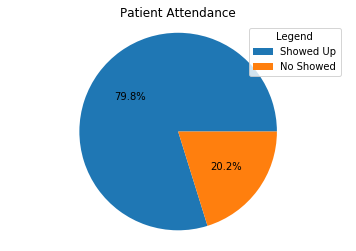

In [54]:
#create pie chart to show the distribution of Shows vs No Shows
labels = ["Showed Up", "No Showed"]
sizes = counts

plt.pie(counts, labels=None, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Patient Attendance')
plt.legend(labels, title='Legend')
plt.show()

A total of 88,207 (79.8%) patients showed up for their appointment, while 22,319 (20.2%) patients were no-shows.

### Research Question 2: How many patients in this data set were Male or Female?

In [55]:
#get counts for gender
counts = df_clean.Gender.value_counts()
counts

F    71839
M    38687
Name: Gender, dtype: int64

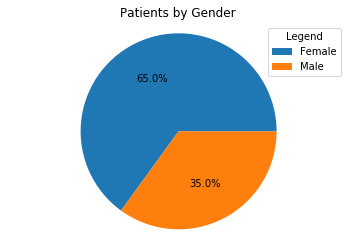

In [56]:
#create visualization
labels = ["Female", "Male"]
sizes = counts

plt.pie(counts, labels=None, autopct='%1.1f%%')
plt.title("Patients by Gender")
plt.legend(labels, title="Legend")
plt.axis('equaL')
plt.show()

Of all patients, there are 71,839 females (65%) and 38,687 males (35%).

### Research Question: Is there an association between patients's Gender and their No Show status?

> Null Hypothesis: There is no association between gender and being a no-show. <br/>
Alternative Hypotehsis: There is an association between gender and being a no-show. <br/>
Significance Level (a): 5% 

If p value <= a, reject the Null Hypothesis <br/>
If p value > a, fail to reject Null Hypothesis


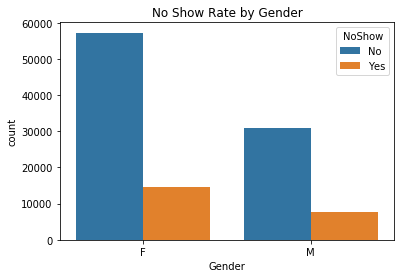

In [57]:
#create visualization
sns.countplot(data=df_clean, x="Gender", hue="NoShow")
plt.title("No Show Rate by Gender")
plt.show()

In [58]:
def calculate_percentage_by_variable(df, independent_variable, dependent_variable):
    """
    Calculate the percentage of occurrences of the dependent variable by the independent variable.

    Parameters:
    dataframe: The input DataFrame.
    independent_variable: The name of the column containing the independent variable.
    dependent_variable: The name of the column containing the dependent variable.

    Returns:
    merged: A DataFrame with the counts and percentages of occurrences of the dependent variable by the independent variable.
    """
    # Group by independent variable and dependent variable and count occurrences
    counts = df.groupby([independent_variable, dependent_variable]).size().reset_index(name='count')

    # Calculate the total counts for each independent variable
    total_counts = df.groupby(independent_variable).size().reset_index(name='total_count')

    # Merge the counts with the total counts
    merged = pd.merge(counts, total_counts, on=independent_variable)

    # Calculate the percentage
    merged['percentage'] = (merged['count'] / merged['total_count']) * 100

    return merged

In [59]:
#Lets see the occurences of Shows vs No Shows of patients by Gender
#using custom function to replace repetitive code:

calculate_percentage_by_variable(df_clean, 'Gender', 'NoShow')

,Gender,NoShow,count,total_count,percentage
0,F,No,57245,71839,79.685129
1,F,Yes,14594,71839,20.314871
2,M,No,30962,38687,80.032052
3,M,Yes,7725,38687,19.967948


In [60]:
#lets take a closer look at the significance of this variable using a Chi-Square test.
a = 0.05
contingency_table = pd.crosstab(df_clean['Gender'], df_clean['NoShow'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p <= a:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject")

NoShow     No    Yes
Gender              
F       57245  14594
M       30962   7725
Chi-Square Statistic: 1.8564579422090786, P-Value: 0.17303416173736574
Fail to reject


While there are significantly more records for female patients, we can see that a majority of patients of both genders attended their appointments.

For female patients, 79.68% of patients attended their appontments while 20.31% did not.

For male patients, 80.03% of patients attended their appointments while 19.96% did not.

Considering the p-value is greater than the chosen signficance level, we cannot conclude that there is statistically signficaint association between gender and if a patient will No Show.

### Research Question: Is there an association between patients Age and their No Show status?

> Null Hypothesis: There is no association between Age and being a no-show. <br/>
Alternative Hypotehsis: There is an association between Age and being a no-show. <br/>
Significance Level (a): 5% 

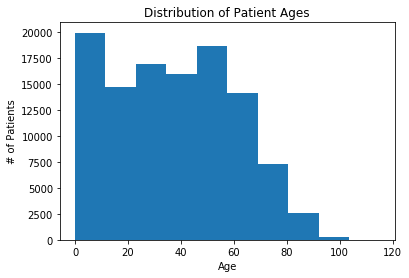

In [61]:
#lets look at the distribution of patient's ages. Since Age is continous data, 
#I'm opting for a Histogram rather than previously used visualizations.
plt.hist(df_clean['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('# of Patients')
plt.title('Distribution of Patient Ages')
plt.show()

There is a wide range of Ages. To be able to more effectively draw conclusions, we will need to segement ages into categories such as Child, Teenager, Adult, Senior Citizens, etc.

In [103]:
#create age categories
#using float('inf') to take into consideration all ages beyond 65
df_clean['AgeCategory'] = pd.cut(df_clean.Age, bins=[0,12,18,65, float('inf')], labels=["Child", "Teenager", "Adult", "Senior"], include_lowest=True)
                                 
#check dataframe for patients that are between ages 0 and 1 to be sure they're sgemented as a child:
df_clean.query("Age == 0")

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,NoShowBinary,AgeCategory
59,7.18442847453e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No,0,Child
63,2.36623344873e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No,0,Child
64,1.88517384713e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No,0,Child
65,2.718818178e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No,0,Child
67,8.64712825135e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No,0,Child
89,4.3149316416e+14,5640380,M,2016-04-29 10:37:02,2016-04-29,0,MONTE BELO,0,0,0,0,0,0,No,0,Child
101,6.82284733716e+13,5642813,M,2016-04-29 17:24:19,2016-04-29,0,BONFIM,0,0,0,0,0,0,No,0,Child
104,3.32698521425e+12,5632495,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,1,Child
132,8.46858655833e+14,5560742,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes,1,Child
150,53924187266.0,5641476,M,2016-04-29 13:43:34,2016-04-29,0,ITARARÉ,0,0,0,0,0,0,No,0,Child


In [105]:
#get value counts
labels=["Child", "Teenager", "Adult", "Senior"]
sizes = df_clean.AgeCategory.value_counts()
sizes

Adult       68359
Child       21036
Senior      13301
Teenager     7830
Name: AgeCategory, dtype: int64

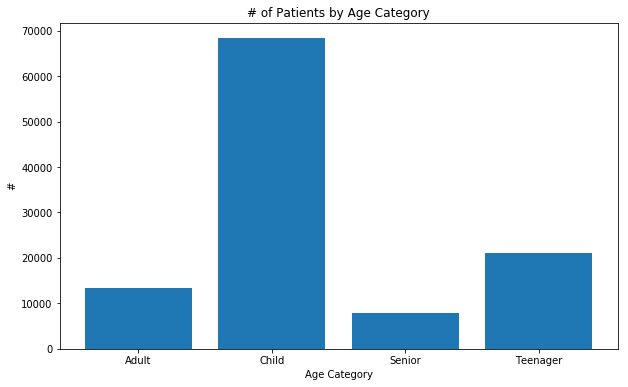

In [106]:
#lets visualize the above counts
plt.figure(figsize=(10,6))
plt.bar(labels, sizes)
plt.title('# of Patients by Age Category')
plt.xlabel('Age Category')
plt.ylabel('#')
plt.show()

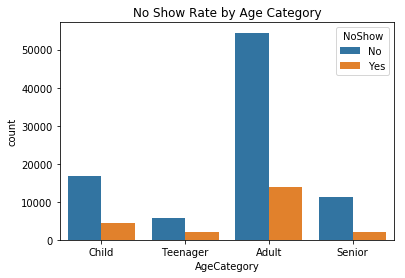

In [107]:
#visualization to look at no show rate and Age Category
#create visualization
sns.countplot(data=df_clean, x="AgeCategory", hue="NoShow")
plt.title("No Show Rate by Age Category")
plt.show()

In [108]:
#Lets see the frequencies and percentages of Shows vs No Shows of patients and their Age Category
#using custom function for repetitive code
calculate_percentage_by_variable(df_clean, 'AgeCategory', 'NoShow')

,AgeCategory,NoShow,count,total_count,percentage
0,Child,No,16729,21036,79.525575
1,Child,Yes,4307,21036,20.474425
2,Teenager,No,5790,7830,73.946360
3,Teenager,Yes,2040,7830,26.053640
4,Adult,No,54453,68359,79.657397
5,Adult,Yes,13906,68359,20.342603
6,Senior,No,11235,13301,84.467333
7,Senior,Yes,2066,13301,15.532667


In [109]:
a = 0.05
contingency_table = pd.crosstab(df_clean['AgeCategory'], df_clean['NoShow'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p <= a:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject")

NoShow          No    Yes
AgeCategory              
Child        16729   4307
Teenager      5790   2040
Adult        54453  13906
Senior       11235   2066
Chi-Square Statistic: 348.1168420700798, P-Value: 3.8144595778286806e-75
Reject the Null Hypothesis


We can see that the p-value between Age and NoShow variables is less than our significance level, which means we can conclude that there is a significant association between these two variables and it can be used to predict whether or not a patient will No-Show.

### Research Question: Is there an association between patients with Scholarships and their No Show status?

> Null Hypothesis: There is no association between scholarship and being a no-show. <br/>
Alternative Hypotehsis: There is an association between scholarship and being a no-show. <br/>
Significance Level (a): 5% 

If p value <= a, reject the Null Hypothesis <br/>
If p value > a, fail to reject Null Hypothesis


In [110]:
#grab counts
counts = df_clean.Scholarship.value_counts()
counts

0    99665
1    10861
Name: Scholarship, dtype: int64

There are 99,665 patients who do not have a scholarship. There are 10,861 patients who do have a scholarship.

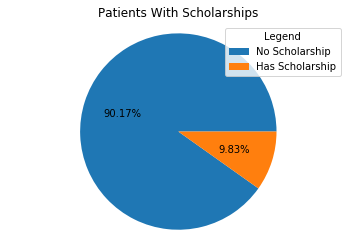

In [111]:
#lets visualize the numbers above
labels = ["No Scholarship", "Has Scholarship"]
sizes = counts

plt.pie(counts, labels=None, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Patients With Scholarships')
plt.legend(labels, title='Legend')
plt.show()

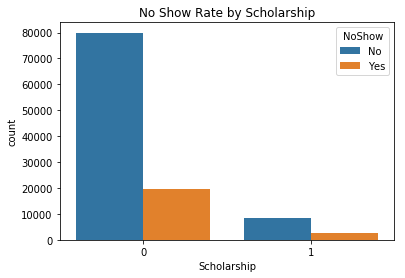

In [112]:
#visualization to look at no show rate and scholarship status
#create visualization
sns.countplot(data=df_clean, x="Scholarship", hue="NoShow")
plt.title("No Show Rate by Scholarship")
plt.show()

In [113]:
#Lets see the occurences of Shows vs No Shows of patients by Scholarship status
#using custom function for repetitive code
calculate_percentage_by_variable(df_clean, 'Scholarship', 'NoShow')

,Scholarship,NoShow,count,total_count,percentage
0,0,No,79924,99665,80.192645
1,0,Yes,19741,99665,19.807355
2,1,No,8283,10861,76.263696
3,1,Yes,2578,10861,23.736304


In [114]:
#lets take a closer look at the significance of this variable using a Chi-Square test.
a = 0.05
contingency_table = pd.crosstab(df_clean['Scholarship'], df_clean['NoShow'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p <= a:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject")

NoShow          No    Yes
Scholarship              
0            79924  19741
1             8283   2578
Chi-Square Statistic: 93.56699405193226, P-Value: 3.9268156991039656e-22
Reject the Null Hypothesis


Of the 99,665 patients who do not have a scolarship, 79,924 patients (80.19%) of patients attended their appointments while 19,741 patients (19.81%) did not attend their appointment. Of the 10,861 patients who do have a scholarship, 8,283 patients (76.26%) attended their appointment, while 2,578 patients (23.74%) did not.

Given the differences in the two cohorts, I ran a statistical test that determined our p-value is less than our significance level, which means that we have enough evidence to conclude that there is a statistically significant association between having a Scholarship and whether or not a patient will No-Show.

### Research Question 6: Is there an association between patients with Hypertension and their No Show status?

> Null Hypothesis: There is no association between Hypertension and being a no-show. <br/>
Alternative Hypotehsis: There is an association between Hypertension and being a no-show. <br/>
Significance Level (a): 5% 

If p value <= a, reject the Null Hypothesis <br/>
If p value > a, fail to reject Null Hypothesis

In [115]:
#grab counts
counts = df_clean.Hypertension.value_counts()
counts

0    88725
1    21801
Name: Hypertension, dtype: int64

Of the 110,527 patients in this dataset, 88,725 patients do NOT suffer from Hypertension while 21,801 patients do suffer from Hypertension.

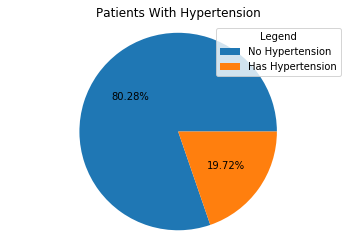

In [116]:
#lets visualize the numbers above
labels = ["No Hypertension", "Has Hypertension"]
sizes = counts

plt.pie(counts, labels=None, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Patients With Hypertension')
plt.legend(labels, title='Legend')
plt.show()

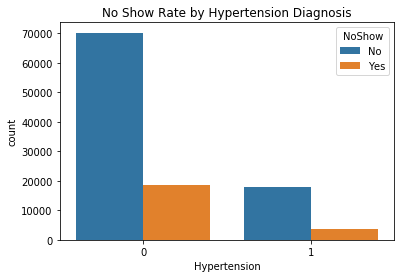

In [117]:
#visualization to look at no show rate and Hypertension status
#create visualization
sns.countplot(data=df_clean, x="Hypertension", hue="NoShow")
plt.title("No Show Rate by Hypertension Diagnosis")
plt.show()

In [118]:
#Lets see the frequencies and percentages of Shows vs No Shows of patients by Hypertension diagnosis
#using custom function for repetitive code
calculate_percentage_by_variable(df_clean, 'Hypertension', 'NoShow')

,Hypertension,NoShow,count,total_count,percentage
0,0,No,70178,88725,79.096083
1,0,Yes,18547,88725,20.903917
2,1,No,18029,21801,82.698041
3,1,Yes,3772,21801,17.301959


In [119]:
#lets take a closer look at the significance of this variable using a Chi-Square test.
a = 0.05
contingency_table = pd.crosstab(df_clean['Hypertension'], df_clean['NoShow'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p <= a:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject")

NoShow           No    Yes
Hypertension              
0             70178  18547
1             18029   3772
Chi-Square Statistic: 140.66859528017784, P-Value: 1.9011212241495915e-32
Reject the Null Hypothesis


Of the 88,825 patients who did not receive a text message reminder about their appointment, 70,178 (79.1%) showed up for their appointment while 18,547 patients (20.9%) were No Shows. OF the 21,801 patients that did receive a text message, 18,029 patients (82.70%) showed up for the appointment while 3,772 patients (17.30%) were No Shows.

Because the difference between No Shows between the two groups is only 3.6%, I ran a statisitical test to better understand the relationship between these variables.

We can see that the P-Value between these two variables is less than the signfifiance level, which means we can conclude that there is a significant associtation between these two variables and can be used to predict whether or not a patient will No-Show.

### Research Question 7: Is there an association between patients with Diabetes and their No Show status?
> Null Hypothesis: There is no association between Diabetes and being a no-show. <br/>
Alternative Hypotehsis: There is an association between Diabetes and being a no-show. <br/>
Significance Level (a): 5% 

If p value <= a, reject the Null Hypothesis <br/>
If p value > a, fail to reject Null Hypothesis

In [120]:
#grab counts
counts = df_clean.Diabetes.value_counts()
counts

0    102583
1      7943
Name: Diabetes, dtype: int64

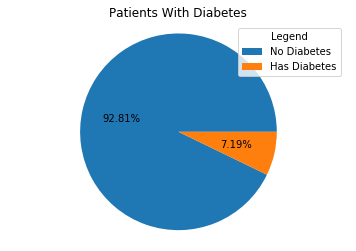

In [121]:
#lets visualize the numbers above
labels = ["No Diabetes", "Has Diabetes"]
sizes = counts

plt.pie(counts, labels=None, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Patients With Diabetes')
plt.legend(labels, title='Legend')
plt.show()

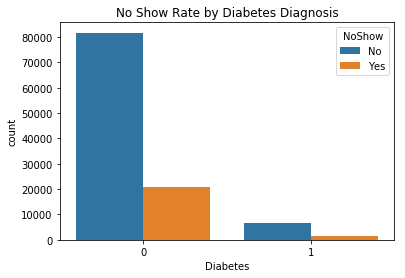

In [122]:
#visualization to look at no show rate and Diabetes diagnosis
#create visualization
sns.countplot(data=df_clean, x="Diabetes", hue="NoShow")
plt.title("No Show Rate by Diabetes Diagnosis")
plt.show()

In [123]:
#Lets see the frequencies and percentages of Shows vs No Shows of patients by Diabetes diagnosis
#using custom function for repetitive code
calculate_percentage_by_variable(df_clean, 'Diabetes', 'NoShow')

,Diabetes,NoShow,count,total_count,percentage
0,0,No,81694,102583,79.636977
1,0,Yes,20889,102583,20.363023
2,1,No,6513,7943,81.996727
3,1,Yes,1430,7943,18.003273


In [124]:
#lets take a closer look at the significance of this variable using a Chi-Square test.
a = 0.05
contingency_table = pd.crosstab(df_clean['Diabetes'], df_clean['NoShow'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p <= a:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject")


NoShow       No    Yes
Diabetes              
0         81694  20889
1          6513   1430
Chi-Square Statistic: 25.326693550869877, P-Value: 4.839646820880228e-07
Reject the Null Hypothesis


Of the 88,725 patients who do not have diabetes, 70,178 patients (79.10%) showed up to their appointments while 18,547 patients (20.90%) were No Shows. Of the 21,801 patients who do have diabetes, 18,029 patients (82.70%) showed up to the appointments while 3,772 patients (17.30%) were No Shows.

Because the difference between No Shows between the two groups is only 3.6%, I ran a statisitical test to better understand if No Show was dependent upon the Hypertension variable. 

We can see that the p-value between these two variables is less than our significance level, which means we can conclude that there is a significant association between these two variables and it can be used to predict whether or not a patient will No-Show.

### Research Question 8: Is there an association between patients with Alcoholism and their No Show status?
> Null Hypothesis: There is no association between Alcoholism and being a no-show. <br/>
Alternative Hypotehsis: There is an association between Alcoholism and being a no-show. <br/>
Significance Level (a): 5% 

If p value <= a, reject the Null Hypothesis <br/>
If p value > a, fail to reject Null Hypothesis

In [125]:
#grab counts
counts = df_clean.Alcoholism.value_counts()
counts

0    107166
1      3360
Name: Alcoholism, dtype: int64

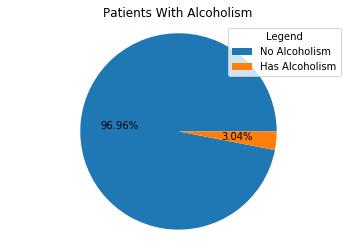

In [126]:
#lets visualize the numbers above
labels = ["No Alcoholism", "Has Alcoholism"]
sizes = counts

plt.pie(counts, labels=None, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Patients With Alcoholism')
plt.legend(labels, title='Legend')
plt.show()

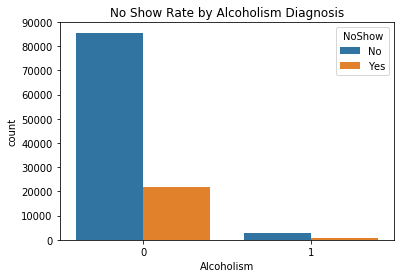

In [127]:
#visualization to look at no show rate and Diabetes diagnosis
#create visualization
sns.countplot(data=df_clean, x="Alcoholism", hue="NoShow")
plt.title("No Show Rate by Alcoholism Diagnosis")
plt.show()

In [128]:
#Lets see the frequencies and percentages of Shows vs No Shows of patients by Hypertension diagnosis
#using custom function for repetitive code
calculate_percentage_by_variable(df_clean, 'Alcoholism', 'NoShow')

,Alcoholism,NoShow,count,total_count,percentage
0,0,No,85524,107166,79.805162
1,0,Yes,21642,107166,20.194838
2,1,No,2683,3360,79.851190
3,1,Yes,677,3360,20.148810


In [129]:
#statistical analysis
a = 0.05
contingency_table = pd.crosstab(df_clean['Alcoholism'], df_clean['NoShow'])
chi2, p, dof, ex= chi2_contingency(contingency_table)

print(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p <= a:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject")

NoShow         No    Yes
Alcoholism              
0           85524  21642
1            2683    677
Chi-Square Statistic: 0.0019029106265759325, P-Value: 0.9652054249010444
Fail to reject


Of the 107,166 patients who do not suffer from alcoholism, 85,524 patients (79.81%) showed up for the appointments while 21,642 patients (20.21%) were No Shows. OF the 3,360 patients who suffer from alcoholism, 2,683 (79.85%) showed up for their appointments, while 677 patients (20.15%) were No Shows.

It appears that both alcholic patients and non-alcoholic patients showed up for their appointments at very similar rates. With that in mind, we can conclude Alcoholism is not an important factor for predicting whether or not a patient will No Show.

In this case, it appears that the p-value between these two variables is actually greater than our significance level, which means that we cannot conclude at this time that there is an association between these two variables. We cannot use this variable to predict whether or not a patient will No-Show.

### Research Question 9: Is there an association between patients with Handicaps and their No Show status?
> Null Hypothesis: There is no association between Handicaps and being a no-show. <br/>
Alternative Hypotehsis: There is an association between Handicaps and being a no-show. <br/>
Significance Level (a): 5% 

In [130]:
#grab counts
counts = df_clean.Handicap.value_counts()
counts

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

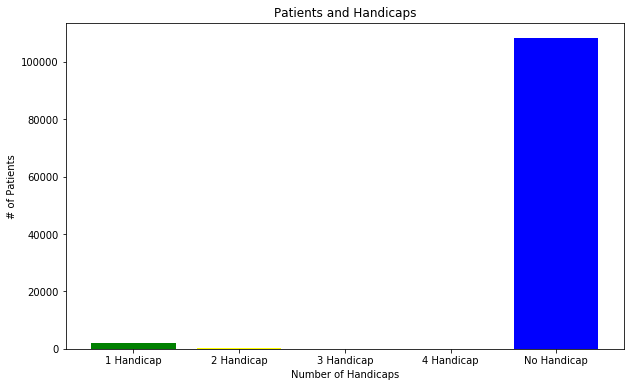

In [131]:
#lets visualize the numbers above
labels = ["No Handicap", "1 Handicap", "2 Handicap", "3 Handicap", "4 Handicap"]
sizes = counts
colors = ['blue', 'green', 'yellow', 'orange', 'red']

#given a pie chart isn't readable in this situation, I am opting for a  bar chart:
plt.figure(figsize=(10,6))
plt.bar(labels, sizes, color=colors)
plt.title('Patients and Handicaps')
plt.xlabel('Number of Handicaps')
plt.ylabel('# of Patients')
plt.show()


In [132]:
#Lets see the frequencies and percentages of Shows vs No Shows of patients and their handicap diagnosis
#using custom function for repetitive code
calculate_percentage_by_variable(df_clean, 'Handicap', 'NoShow')

,Handicap,NoShow,count,total_count,percentage
0,0,No,86373,108285,79.764510
1,0,Yes,21912,108285,20.235490
2,1,No,1676,2042,82.076396
3,1,Yes,366,2042,17.923604
4,2,No,146,183,79.781421
5,2,Yes,37,183,20.218579
6,3,No,10,13,76.923077
7,3,Yes,3,13,23.076923
8,4,No,2,3,66.666667
9,4,Yes,1,3,33.333333


In [133]:
a = 0.05
contingency_table = pd.crosstab(df_clean['Handicap'], df_clean['NoShow'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p <= a:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject")

NoShow       No    Yes
Handicap              
0         86373  21912
1          1676    366
2           146     37
3            10      3
4             2      1
Chi-Square Statistic: 7.0355910310228875, P-Value: 0.13401931354992297
Fail to reject


To be brief, we are only going to look at patients with Handicaps that No-Showed and how the rates of No Showing compares among all groups of patients.

- Of the 108,285 patients without a Handicap, 21,912 patients (20.24%) No Showed. <br/>
- Of the 2,042 patients with 1 Handicap, 366 patients (17.92%) No Showed. <br/>
- Of the 183 patients with 2 Handicaps, 37 patients (20.22%) No Showed. <br/>
- Of the 13 patietns with 3 Handicaps, 3 patients (23.10%) No Showed. <br/>
- Of the 3 patients with 4 Handicaps, 1 patient (33.33%) No Showed.

Given the variability in these results, we'll want to run a statistical test to determine association.

After running our statistical analysis, we can see that the p-value is greater than our significance level. Therefore, we cannot conclude that there is a significant association between these two variables and Handicaps cannot be used to predict whether or not a patient will No-Show.

### Research Question: Is there an association between SMS_received and their No Show status?

> Null Hypothesis: There is no association between SMS_received and being a no-show. <br/>
Alternative Hypotehsis: There is an association between SMS_received and being a no-show. <br/>
Significance Level (a): 5% 

If p value <= a, reject the Null Hypothesis <br/>
If p value > a, fail to reject Null Hypothesis

In [134]:
#grab counts
counts = df_clean.SMS_received.value_counts()
counts

0    75044
1    35482
Name: SMS_received, dtype: int64

75,044 patients did NOT receive a text message, while 35,482 patients did receive a text message. Unfortunately there is no additional information that indicates the reason patients did not receive the message - i.e. not enrolled in text reminders, no phone number, etc.

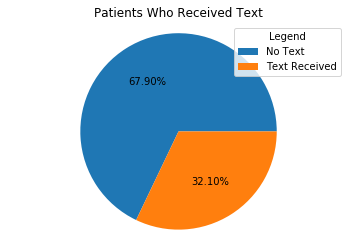

In [135]:
#lets visualize the numbers above
labels = ["No Text", "Text Received"]
sizes = counts

plt.pie(counts, labels=None, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Patients Who Received Text')
plt.legend(labels, title='Legend')
plt.show()

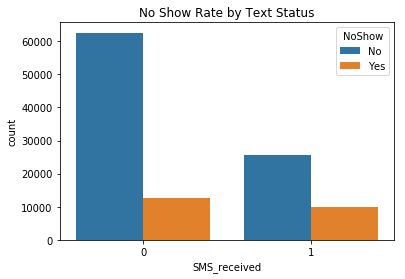

In [136]:
#visualization to look at no show rate and text status
#create visualization
sns.countplot(data=df_clean, x="SMS_received", hue="NoShow")
plt.title("No Show Rate by Text Status")
plt.show()

In [137]:
#Lets see the frequencies and percentages of Shows vs No Shows of patients by text status
#using custom function for repetitive code
calculate_percentage_by_variable(df_clean, 'SMS_received', 'NoShow')

,SMS_received,NoShow,count,total_count,percentage
0,0,No,62509,75044,83.296466
1,0,Yes,12535,75044,16.703534
2,1,No,25698,35482,72.425455
3,1,Yes,9784,35482,27.574545


In [138]:
#lets take a closer look at the significance of this variable using a Chi-Square test.
a = 0.05
contingency_table = pd.crosstab(df_clean['SMS_received'], df_clean['NoShow'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(contingency_table)

print(f'Chi-Square Statistic: {chi2}, P-Value: {p}')

if p <= a:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject")

NoShow           No    Yes
SMS_received              
0             62509  12535
1             25698   9784
Chi-Square Statistic: 1765.9758338861106, P-Value: 0.0
Reject the Null Hypothesis


Of the 75,044 patients who did not receive a text mesage, 62,509 patients (83.29%) showed up to their appointment while 12,535 (16.70%) were No Shows. Of the 35,482 patients who did receive a text message (72.43%) showed up to their appointments while 9,784 (27.6%) were No Shows.

It appears as if patients who received a text message are LESS likely to show up to their appointments.

Because the difference between No Shows between the two groups is only 3.6%, I ran a statisitical test to better understand if No Show was dependent upon the SMS_received variable. 

Given the difference between the two cohorts, I ran a statistical test that determined the p-value is less than the significance level. This means that there is statistical evidence to conclude that there is a significant association between these two variables.

<a id='conclusions'></a>
## Conclusions

### Variables that can be used to predict outcomes:
The following varibles have enough statistical significance to be used in predicting whether or not a patient will NoShow:

- Age
- Scholarship
- Hypertension
- Diabetes
- SMS_received

### Variables with not enough evidence to determine significance:
- Gender
- Alcoholism
- Handicaps

### Variables not used in this analysis:
- Neighborhood
- ScheduledDate
- AppointmentDate

### Limitations
- It is worth noting that I did not perform analysis on all features (dates, neighbourhood, etc.). There could be further insights in these columns not included in this analysis.
- Much of the analysis and statistical tests are done on relationships between two categorical variables, limiting the types of tests I can use to determine significance.
- Given the lack of insight on more advance testing techniques, I opted to segment age into 4 different categories and then use that categorical data to look at significance between Age and NoShow. It's possible this could affect outcome, although unlikely. 
- Also worth noting that age segmentation doesn't necessarily provide an answer as to why a patient might NoShow to their appointment. Often times children under the age of 18 are not the ones responsible for the appointment, but rather the parent needs to make sure the child/teenager goes. Not necessarily a limitation, but just a callout.

### Attributions
- Udacity GPT / Chat GPT for questions around understanding of which statistical tests to use to determine significance of variables and how to set them up.
- For understanding which types of Visualizations are most appropriate for Categorical data investgiated in this Notebook: https://www.codecademy.com/learn/dscp-summary-statistics/modules/dacp-visualizing-categorical-data/cheatsheet
- Additional research on statistical tests: https://builtin.com/data-science/t-test-vs-chi-square



In [139]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0